##             <center>8FIT DATA SCIENCE ASSIGNMENT</center>                      

**1\. Import the different libraries to be used for the data exploration and prediction**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns # Data visualization
import numpy as np   #fundamental package for scientific computing
import pandas as pd  #fundamental package for data analysis
from sklearn.ensemble import RandomForestClassifier # package for binary classification (decision tree)
from sklearn.linear_model import LogisticRegression # package for binary classification (logistic regression)
from sklearn import metrics # package for getting metrics out of the model
from sklearn.metrics import confusion_matrix # package for getting metrics out of the model
from sklearn.metrics import f1_score # package for getting metrics out of the model
from sklearn.metrics import roc_auc_score, roc_curve, auc # Metrics for classification algorithms
from sklearn.model_selection import train_test_split # package to split the data in a training and crossvalidation set
from sklearn.model_selection import GridSearchCV # package to search and find the best hyperparameters on the model
from sklearn.preprocessing import StandardScaler # package to scale (normalize) the features
from sklearn.preprocessing import PolynomialFeatures # package to add features interactions
from sklearn.pipeline import Pipeline # package to create a pipeline for the machine learning model

**2\. Read the train_data csv file and assign it to a dataframe named "df"**

In [2]:
df = pd.read_csv("data/train_data.csv.csv_fixed")

**3\. Data exploration**

In [3]:
df.head() #quick look at the first five rows of the dataset

,user_id,channel,age,os,gender,country,customer
0,100000,00 Organic,20,ios,female,GB,0
1,100001,00 Organic,30,ios,female,US,1
2,100002,31 OUTBRAIN,35,ios,female,DE,0
3,100003,00 Organic,26,android,female,US,0
4,100004,32 Taboola,55,ios,female,US,1


In [4]:
df.isnull().sum() # clean dataset with no "nan" values in any columns

user_id     0
channel     0
age         0
os          0
gender      0
country     0
customer    0
dtype: int64

In [5]:
df.info() #high overview of the dataset with columns datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82908 entries, 0 to 82907
Data columns (total 7 columns):
user_id     82908 non-null int64
channel     82908 non-null object
age         82908 non-null int64
os          82908 non-null object
gender      82908 non-null object
country     82908 non-null object
customer    82908 non-null int64
dtypes: int64(3), object(4)
memory usage: 4.4+ MB


In [6]:
len(df[df['age'] > 60])/len(df)

0.015185506826844213

In [7]:
58212/83000

0.7013493975903614

*We can observe that the dataset contains data regarding 82908 users and that it has 7 columns. Three of them are numerical and four are objects (ie. string).*

In [8]:
df.describe() #handy statistics about numerical columns

,user_id,age,customer
count,82908.000000,82908.000000,82908.000000
mean,141453.500000,31.151734,0.297848
std,23933.622396,11.596902,0.457315
min,100000.000000,12.000000,0.000000
25%,120726.750000,22.000000,0.000000
50%,141453.500000,29.000000,0.000000
75%,162180.250000,38.000000,1.000000
max,182907.000000,96.000000,1.000000


*The describe method gives us basic statistic on the numerical columns. We can observe that the average age of the users in our dataset is at 31 years and that the data contains 70% of non-customers and 30% of customers (mean customer is at 0.297848). The dataset is therefore slightly unbalanced on the target variable.*

In [9]:
df['customer'].value_counts() # Quick check on the values in the customer column

0    58214
1    24694
Name: customer, dtype: int64

In [10]:
df["channel"].value_counts() # Quick check on the values in the channel column

00 Organic             21795
12 PINTEREST           13564
11 FB                   8857
22 Adwords (Search)     7371
95 LAT                  7043
41 Youtube              6522
31 OUTBRAIN             6237
42 Adcolony             4806
32 Taboola              2789
21 ASA                  2108
69 Others                876
62 Social Media          550
61 Web/Content           390
Name: channel, dtype: int64

In [11]:
df["country"].value_counts() # Quick check on the values in the customer column

US    50855
GB     9226
MX     5755
CA     4483
ES     4172
AU     3398
DE     2849
FR     2170
Name: country, dtype: int64

In [12]:
np.sort(df["age"].unique()) # Quick check on the values in the age column

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
       80, 81, 82, 83, 85, 86, 87, 94, 95, 96])

In [13]:
df["gender"].value_counts() # Quick check on the values in the gender column

female    57031
male      25877
Name: gender, dtype: int64

In [14]:
df["os"].value_counts() # Quick check on the values in the os column

ios        48662
android    34246
Name: os, dtype: int64

**4\. Data visualization**

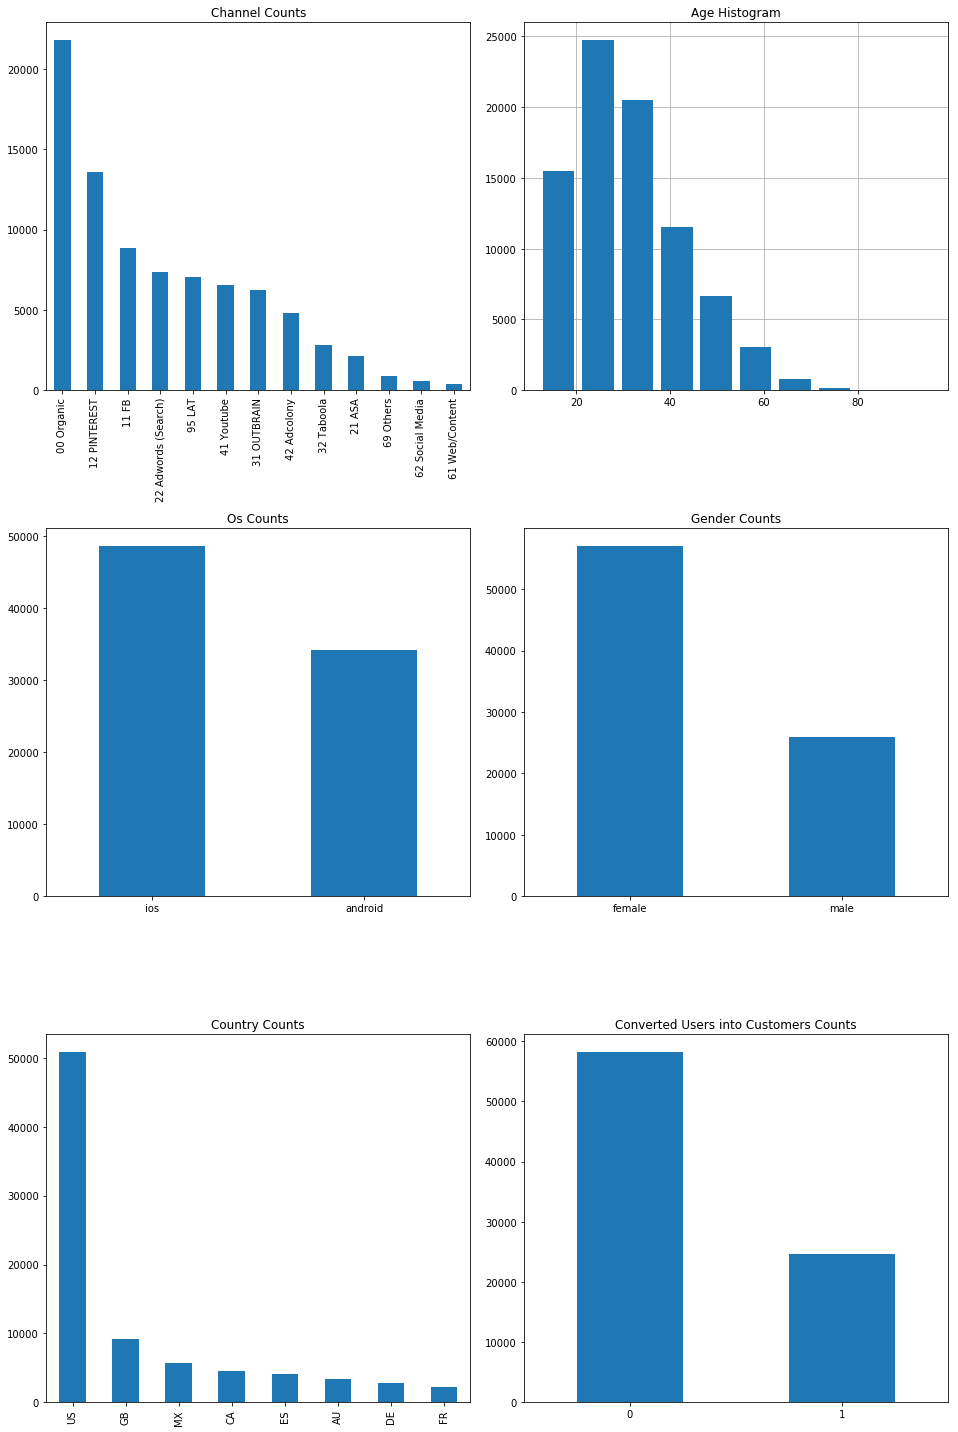

In [16]:
# Set up a grid of plots
fig = plt.figure(figsize=(20, 20)) 
fig_dims = (3, 3)

# Plot channel counts
plt.subplot2grid(fig_dims, (0, 0))
df['channel'].value_counts().plot(kind='bar', title='Channel Counts')

# Plot age counts as a hist
plt.subplot2grid(fig_dims, (0, 1))
df['age'].hist(rwidth = 0.8, zorder=5)
plt.title('Age Histogram')

# Plot os counts
plt.subplot2grid(fig_dims, (1, 0))
df['os'].value_counts().plot(kind='bar', title='Os Counts')
plt.xticks(rotation=0)

# Plot gender counts
plt.subplot2grid(fig_dims, (1, 1))
df['gender'].value_counts().plot(kind='bar', title='Gender Counts')
plt.xticks(rotation=0)

# Plot country counts
plt.subplot2grid(fig_dims, (2, 0))
df['country'].value_counts().plot(kind='bar', title='Country Counts')

# Plot customer counts
plt.subplot2grid(fig_dims, (2, 1))
df['customer'].value_counts().plot(kind='bar', title='Converted Users into Customers Counts')
plt.xticks(rotation=0)

plt.tight_layout()

*These six charts enable to get a good grasp about our dataset. Some insights:*
- *Half of the users come from the following three channels: Organic, Pinterest and Facebook*
- *The users are mainly between 20 and 40 years old.*
- *There are more users on Android but the difference is small.*
- *The females clearly outnumber the number of males (more than the double)*
- *US is the country with by far the most users (more than half of the total users)*


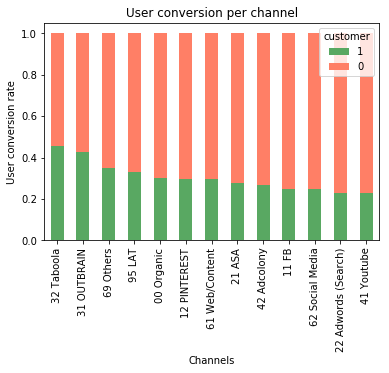

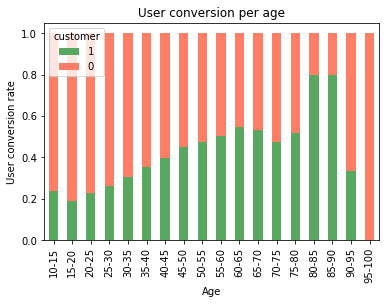

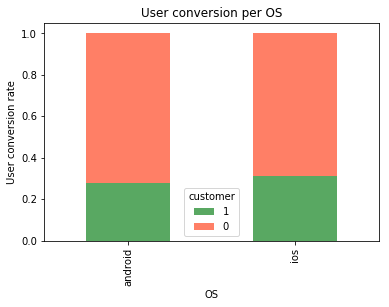

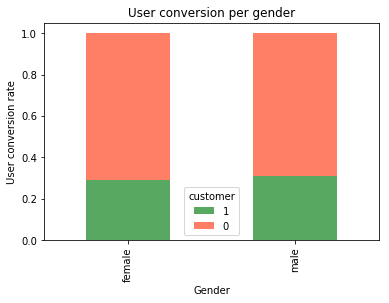

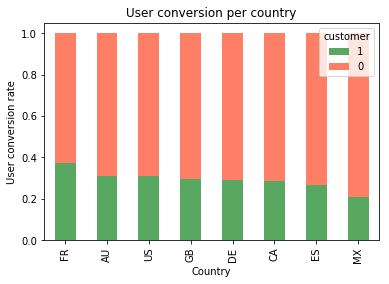

In [37]:
# We now check for the conversion probability for each category per feature
colors = ['#59a862','#ff7f66']

# channel conversion probability
chan = pd.crosstab(df['channel'],df['customer'])
chan = chan.div(chan.sum(1).astype(float), axis=0)
chan = chan.sort_values(0)
chan[[1,0]].plot(kind='bar', stacked=True, title='User conversion per channel',color= colors)
plt.xlabel('Channels')
plt.ylabel('User conversion rate')

# age conversion probability
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
group_names = ['10-15', '15-20', '20-25', '25-30',
               '30-35', '35-40','40-45', '45-50', '50-55', '55-60','60-65',
               '65-70','70-75','75-80','80-85','85-90','90-95','95-100' ]
df['age_groups'] = pd.cut(df['age'], bins, labels = group_names)
age = pd.crosstab(df['age_groups'], df['customer'])
age = age.div(age.sum(1).astype(float), axis=0)
age[[1,0]].plot(kind='bar', stacked=True, title='User conversion per age', color= colors)
plt.xlabel('Age')
plt.ylabel('User conversion rate')

# os conversion probability
os = pd.crosstab(df['os'],df['customer'])
os = os.div(os.sum(1).astype(float), axis=0)
os[[1,0]].plot(kind='bar', stacked=True, title='User conversion per OS', color= colors)
plt.xlabel('OS')
plt.ylabel('User conversion rate')

# gender conversion probability
gender = pd.crosstab(df['gender'],df['customer'])
gender = gender.div(gender.sum(1).astype(float), axis=0)
gender[[1,0]].plot(kind='bar', stacked=True, title='User conversion per gender', color= colors)
plt.xlabel('Gender')
plt.ylabel('User conversion rate')

# country conversion probability
country = pd.crosstab(df['country'],df['customer'])
country = country.div(country.sum(1).astype(float), axis=0)
country = country.sort_values(0)
country[[1,0]].plot(kind='bar', stacked=True, title='User conversion per country', color= colors)
plt.xlabel('Country')
plt.ylabel('User conversion rate')

*We can draw the following conclusion on the conversion of customer per feature:*
 - *the users using the channel "OUTBRAIN" and "TABOOLA" have higher probability to convert into customers (with 40%). Otherwise the probability is between 20% and 30%.*
 - *The older the user, the higher is the likelihood he will convert into a customer*
 - *OS and Gender don't matter in the conversion rate.*
 - *Country does not matter really. France has the highest conversion rate and Mexico the lowest but the difference is small.*

**5\. Data Cleaning**

In [13]:
def cleaning(df):
    df = df.drop('user_id', axis = 1) #remove the user_id as this is irrelevant for the prediction
    
    for i in df.columns: #loop on every object column and convert it to dommuy variable
        if df[i].dtype == "O":
            df = pd.concat([df, pd.get_dummies(df[i], prefix = i)], axis=1)
            del df[i] #delete the original object column
    
    if 'age_groups' in df.columns:
        del df["age_groups"]
    
    if 'customer' in df.columns: # as the cleaning will be performed also on the test and it does not contain the customer column
        df_y = df["customer"]
        df_x = df.drop(["customer"], axis = 1)
        return df_x, df_y
    else:
        return df

**6\. Machine Learning (Prediction)**

In [14]:
# #return a two dataframes that will be used for fitting a machine learning model (df_x and df_y)
df_x, df_y = cleaning(df)

In [15]:
df_x.info() #sanity check to see that there are no more columns of type "Objects"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82908 entries, 0 to 82907
Data columns (total 26 columns):
age                            82908 non-null int64
channel_00 Organic             82908 non-null uint8
channel_11 FB                  82908 non-null uint8
channel_12 PINTEREST           82908 non-null uint8
channel_21 ASA                 82908 non-null uint8
channel_22 Adwords (Search)    82908 non-null uint8
channel_31 OUTBRAIN            82908 non-null uint8
channel_32 Taboola             82908 non-null uint8
channel_41 Youtube             82908 non-null uint8
channel_42 Adcolony            82908 non-null uint8
channel_61 Web/Content         82908 non-null uint8
channel_62 Social Media        82908 non-null uint8
channel_69 Others              82908 non-null uint8
channel_95 LAT                 82908 non-null uint8
os_android                     82908 non-null uint8
os_ios                         82908 non-null uint8
gender_female                  82908 non-null uint8
gender_

In [23]:
# Split the dataset in a train set with 80% of the data and a cross-validation set with 20% of the data
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.1, random_state=0)
print ("size of original df: ",df_x.shape[0])
print ("size of training df: ",train_x.shape[0])
print ("size of test df: ",test_x.shape[0])

size of original df:  82908
size of training df:  74617
size of test df:  8291


In [24]:
# Logistic Regression model

estimators = [
            ('scale_predictors', StandardScaler()),
            #('poly features', PolynomialFeatures(interaction_only = True)),
            ('logisticregression', LogisticRegression())
            ]

clf = Pipeline(estimators)

grid_values = dict(logisticregression__C = [1], # Inverse of the regularization factor.
                   logisticregression__max_iter= [100],
                  )

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_acc.fit(train_x, train_y)

y_pred = grid_clf_acc.predict(test_x) # array with 1 and 0 for the prediction on test_x. 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (AUC_ROC): ', grid_clf_acc.best_score_)
print('Test score (accuracy): ', (y_pred == test_y).mean())

Grid best parameter (max. accuracy):  {'logisticregression__C': 1, 'logisticregression__max_iter': 100}
Grid best score (AUC_ROC):  0.630950309936
Test score (accuracy):  0.70546375588


*We observe an accuracy score of 63 % on the grid search (auc_roc) and a score of 70.4% on the test set (accuracy scoring). The small difference is in favor of good generalization of the model on new data. This is not a great result and more feature engineering should be performed to improve the results.*

In [25]:
grid_clf_acc.best_params_

{'logisticregression__C': 1, 'logisticregression__max_iter': 100}

In [26]:
LR_final = LogisticRegression(C = 1, max_iter = 180)

In [75]:
LR_final.fit(train_x, train_y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=180, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
LR_final.score(train_x, train_y)

0.70667542249085324

In [77]:
coef_ranking = list(zip(np.squeeze(LR_final.coef_),train_x.columns))

In [78]:
coef_ranking = sorted(coef_ranking, key = lambda tup: -np.abs(tup[0]))

In [79]:
coef_ranking = list(filter(lambda x: np.abs(x[0]) > 0.1, coef_ranking))

In [80]:
coef_ranking

[(-0.53600085253775653, 'gender_female'),
 (-0.46752431718429927, 'os_android'),
 (-0.45002784875072832, 'country_MX'),
 (-0.44208543064504885, 'os_ios'),
 (-0.37360889529253416, 'gender_male'),
 (-0.31538687910581326, 'channel_42 Adcolony'),
 (-0.31346765883128852, 'country_DE'),
 (-0.28207979070129191, 'channel_11 FB'),
 (-0.27328416387850057, 'channel_62 Social Media'),
 (-0.24821284799827437, 'channel_22 Adwords (Search)'),
 (0.24548923092841829, 'channel_32 Taboola'),
 (-0.23552626480667105, 'channel_41 Youtube'),
 (0.22400607800883071, 'channel_69 Others'),
 (-0.20523361466600701, 'country_ES'),
 (0.19753162789941692, 'channel_31 OUTBRAIN'),
 (0.12190601595112993, 'country_AU')]

In [81]:
important_features = [t[1] for t in coef_ranking]

In [82]:
LR_final2 = LogisticRegression(C = 1, max_iter = 180)

In [83]:
LR_final2.fit(train_x[important_features], train_y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=180, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
LR_final2.score(train_x[important_features], train_y)

0.70203840947773299

In [114]:
proba_train_x = LR_final.predict_proba(train_x)[:,1]

In [117]:
a = np.linspace(0,1,15)

In [118]:
a

array([ 0.        ,  0.07142857,  0.14285714,  0.21428571,  0.28571429,
        0.35714286,  0.42857143,  0.5       ,  0.57142857,  0.64285714,
        0.71428571,  0.78571429,  0.85714286,  0.92857143,  1.        ])

0.632047301143


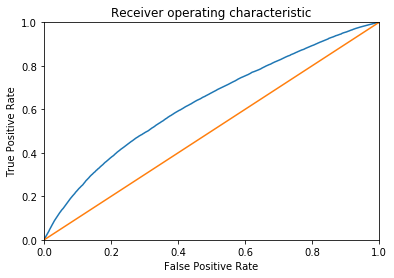

In [120]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(train_y, proba_train_x)
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc_score(train_y, proba_train_x))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.plot(a, a)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [29]:
#Function to draw the accuracy of all the combinations of the hyperparameters
def performance(results, param1, param2):
    param1_vals = list(results.cv_results_['param_' + str(param1)])
    param2_vals = list(results.cv_results_['param_' + str(param2)])
    means = [x for x in results.cv_results_['mean_test_score']]
    df = pd.DataFrame(list(zip(param1_vals, param2_vals, means)), columns = [param1, param2, 'means'])
    df.fillna('None', inplace=True)
    return pd.pivot_table(df, values = 'means' , index = param1, columns = param2)

In [30]:
a = list(grid_clf_acc.param_grid) # get the list of hyper-parameters we are searching (C and max_iter)
train_results = performance(grid_clf_acc, a[0],  a[1]) # apply the performance function on our model
print(train_results)

logisticregression__max_iter      100
logisticregression__C                
1                             0.63095


*Results are almost identical for any combinations (extremely small difference) and best result is achieved with C of 1 and higher. Numbers of iteration do not change the results.*

In [31]:
#Confusion matrix to check the F1 score
cm = pd.DataFrame(confusion_matrix(test_y, y_pred))
cm.index.name='Real'
cm.columns.name='predicted'
cm

predicted,0,1
Real,,
0,5632,196
1,2246,217


In [32]:
# Let's compute the F-score on the test set
f1_score(test_y, y_pred)

0.15090403337969399

In [34]:
# Let's compute the F-score in the case where we would predict 0 for each customer
y_pred2 = np.zeros(8291) #initiate an array with only 0 values
y_pred2[4] = 1 # need to put one value to 1 for non-null division
print("F1: ", f1_score(test_y, y_pred2))
print("Accuracy: ", (y_pred2 == test_y).mean())

F1:  0.0
Accuracy:  0.702810276203


*As expected, predictions with only 0 predicted have a F-score of 0 (compared to 0.15 for our model) while both would have around the same accuracy (70%).*

In [48]:
#Random Forest

estimators = [
            ('scale_predictors', StandardScaler()),
            ('randomforests', RandomForestClassifier())
            ]

clf = Pipeline(estimators)

grid_values = dict(randomforests__max_depth=[None], 
                   randomforests__n_estimators=[10, 100])
              
# default metric to optimize over grid parameters: accuracy
grid_clf_rf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_rf_acc.fit(train_x, train_y)

y_pred_rf = grid_clf_acc.predict(test_x) # array with 1 and 0 for the prediction on test_x. 

print('Grid best parameter (max. accuracy): ', grid_clf_rf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_rf_acc.best_score_)
print('Test score (accuracy): ', (y_pred_rf == test_y).mean())

Grid best parameter (max. accuracy):  {'randomforests__max_depth': None, 'randomforests__n_estimators': 100}
Grid best score (accuracy):  0.579493871614
Test score (accuracy):  0.703051501628


*Random forest result is at 68% on the grid search. This is worse than the Logistic Regression but on new data, Random Forest leads to the same result. As the Logistic Regression is easier to interpret, this model has been chosen for the final predictions.*

**7\. Prediction on the final test set**

In [217]:
#Load the test_data.csv file
df_test_set = pd.read_csv("data/test_data.csv.csv_fixed")
df_test_set.head()

,user_id,channel,age,os,gender,country
0,0,42 Adcolony,32,android,female,US
1,1,12 PINTEREST,27,android,female,US
2,2,00 Organic,36,ios,male,GB
3,3,42 Adcolony,29,ios,female,US
4,4,12 PINTEREST,20,ios,female,CA


In [218]:
#Apply the cleaning functon so that our model can be used on it
df_test_final_x = cleaning(df_test_set)

In [219]:
#Make the predictions on the Y
predict_y = grid_clf_acc.predict(df_test_final_x)

In [220]:
#Create a new column on the original test_data.csv file
df_test_set["customer"] = predict_y

In [226]:
#Save the file
df_test_set.to_csv("charles_verleyen_predictions.csv")

In [227]:
#sanity check on the saved file
pd.read_csv("charles_verleyen_predictions.csv").head(5)

,Unnamed: 0,user_id,channel,age,os,gender,country,customer
0,0,0,42 Adcolony,32,android,female,US,0
1,1,1,12 PINTEREST,27,android,female,US,0
2,2,2,00 Organic,36,ios,male,GB,0
3,3,3,42 Adcolony,29,ios,female,US,0
4,4,4,12 PINTEREST,20,ios,female,CA,0
